In [1]:
import pandas as pd

In [2]:
df_usa_house = pd.read_csv("./data/USA_Housing.csv")

In [3]:
df_usa_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df_usa_house.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df_usa_house.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
df_usa_house.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
is_true = pd.isnull(df_usa_house['Avg. Area Number of Rooms'])
df_usa_house[is_true].count()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [8]:
cols = df_usa_house.columns
cols = ["Avg. Area Number of Rooms", "Price"]

df_test = df_usa_house[cols]

In [9]:
df_test.head()

,Avg. Area Number of Rooms,Price
0,7.009188,1.059034e+06
1,6.730821,1.505891e+06
2,8.512727,1.058988e+06
3,5.586729,1.260617e+06
4,7.839388,6.309435e+05


### Missing values

In [10]:
df_test['Avg. Area Number of Rooms']

0       7.009188
1       6.730821
2       8.512727
3       5.586729
4       7.839388
          ...   
4995    6.137356
4996    6.576763
4997    4.805081
4998    7.130144
4999    6.792336
Name: Avg. Area Number of Rooms, Length: 5000, dtype: float64

### Model development
- Separate dependent variable from independent variables.



In [11]:
independent_cols = ['Avg. Area Number of Rooms'] # list(set(cols) - set("Price"))
dependent_cols = ["Price"]

In [12]:
print(dependent_cols)
print(independent_cols)

['Price']
['Avg. Area Number of Rooms']


In [13]:
X =  df_usa_house[independent_cols]
y = df_usa_house[dependent_cols]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [16]:
X_train.shape

(4250, 1)

In [17]:
y_train.shape

(4250, 1)

In [18]:
LRModel = LinearRegression()
LRModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
LRModel.score(X_test, y_test)

0.13539358826427583

In [59]:
import numpy as np
df = df_usa_house.select_dtypes(include=np.number)
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [23]:
df_usa_house.shape

(5000, 7)

In [24]:
from numpy.random import randint


In [27]:
a = randint(1, 10000, 90)

In [30]:
a 

array([4562, 7884, 4216, 6194, 6990,  894, 6624, 4217, 4813, 1928, 7375,
       5947, 6783, 6701, 4166, 3261, 5564, 1587, 5468, 1596, 4519, 7021,
       2023,  980, 4954, 3576, 6704, 8756, 1201, 7161, 8877, 2625, 8132,
       9793, 6366, 1186, 4480, 8600, 5458, 6590, 6975,  613,  314, 4107,
       4027, 7797, 8863, 8540, 7184, 5444, 2560, 7548, 6359, 5102, 7197,
       7277, 6036, 3651, 4476, 6377, 2088, 3625, 6666,  546, 5367,   80,
       8763, 3684, 5569, 2040, 7411, 4097, 4637, 9256, 9844, 2718, 2023,
       5308,  211, 5651, 2513, 9564, 3408, 8415, 2408, 5093, 4951, 6598,
       6211, 3586])

In [34]:
np.random.choice(100000, 10000, replace=False)

array([50474, 77403, 68931, ..., 84196, 78008,   264])

In [39]:
df_usa_house.iloc[[0, 5, 10]]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
10,80527.472083,8.093513,5.042747,4.10,47224.359840,1.707046e+06,"6368 John Motorway Suite 700\nJanetbury, NM 26854"


In [38]:
df_usa_house

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [44]:
a = np.random.shuffle()

In [53]:
a = np.arange(100)

In [54]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [55]:
np.random.shuffle(a)

In [56]:
a

array([92, 20, 91, 49, 69, 24, 98, 26, 95, 80, 10, 57,  4, 36, 89, 70, 90,
       58, 13, 23, 16, 71, 96, 97, 35, 39, 32, 19, 64, 47, 37, 77, 73, 18,
       54, 30, 15, 55, 45, 28, 42, 12, 82,  0, 48, 75, 53, 11, 83,  8, 88,
        2, 87, 60, 51, 74, 25, 52, 84, 65,  1, 68, 85, 67, 94, 61, 41, 62,
       93, 22,  9, 44, 63, 59, 29,  3, 31, 27, 86, 34, 43, 38, 14, 17,  7,
       33, 21, 76, 56,  6, 40, 78, 66, 79,  5, 99, 72, 81, 50, 46])

[[1.         0.79467918]
 [1.         0.82976258]
 [1.         0.32964947]
 [1.         0.73179408]
 [1.         0.98218552]
 [1.         0.75726953]
 [1.         0.18216545]
 [1.         0.97503131]
 [1.         0.63430433]
 [1.         0.02811298]]
[[0.76496154]
 [0.07763227]
 [0.07249063]
 [0.18384815]
 [0.49816398]
 [0.42048145]
 [0.88776176]
 [0.5025691 ]
 [0.66098901]
 [0.46315433]]
(10, 2) (10, 1)
[[ 0.52122011]
 [-0.10891175]]


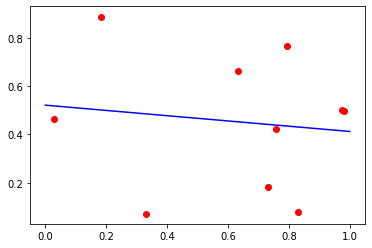

In [65]:
import numpy as np
import matplotlib.pyplot as plt
# Random data
N = 10
M = 2
input = np.random.random((N,M))
# print(input) 
# Setup matrices
m = np.shape(input)[0]
X = np.matrix([np.ones(m), input[:,0]]).T
y = np.matrix(input[:,1]).T

print(X)
print(y)
print(X.shape, y.shape)

# Solve for projection matrix
p_mat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(p_mat)
# Find regression line
xx = np.linspace(0, 1, 2)
yy = np.array(p_mat[0] + p_mat[1] * xx)
# Plot data, regression line
plt.figure(1)
plt.plot(xx, yy.T, color='b')
plt.scatter(input[:,0], input[:,1], color='r')
plt.show()